In [1]:
#!pip install spacy

In [2]:
#!pip install wordcloud

In [3]:
#!pip install nltk

In [4]:
#!python -m spacy download en_core_web_sm

In [5]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_

True

In [6]:
import pandas as pd
import numpy as np
import spacy
nlp=spacy.load('en_core_web_sm')
from wordcloud import wordcloud,STOPWORDS
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("P543.csv",on_bad_lines='skip')

In [8]:
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [9]:
df.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [10]:
df.duplicated().any()

False

In [11]:
df.shape

(1440, 3)

In [12]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [13]:
df['len']=df['body'].apply(len)

In [14]:
df

,title,rating,body,len
0,Horrible product,1,Very disappointed with the overall performance...,59
1,Camera quality is not like 48 megapixel,3,Camera quality is low,21
2,Overall,4,"Got the mobile on the launch date,Battery must...",403
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,377
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",179
...,...,...,...,...
1435,Excellent mobile,5,Excellent mobile,16
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve...",188
1437,Good value for money,5,Battery life is good but camera clarity could ...,98
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied.....",207


In [15]:
df.groupby('rating').describe()

len                                                             
        count        mean         std   min     25%    50%     75%     max
rating                                                                    
1       386.0  297.613990  199.649208   7.0  179.00  260.0  357.75  1768.0
2       126.0  294.920635  170.250009  86.0  185.00  252.5  332.50  1171.0
3       199.0  321.773869  299.950811  16.0  159.50  231.0  393.00  2490.0
4       310.0  321.245161  206.013238  15.0  192.25  274.0  383.25  1298.0
5       419.0  284.914081  235.073250   4.0  151.00  233.0  341.00  1903.0

In [16]:
# Combine title and body into one text column
df['text'] = df['title'] + " " + df['body']

In [17]:
#intilaize tools
stop_words= set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

In [18]:
#So it removes:
#Emojis (😊, 🤔, etc.)
#Numbers (123)
#Special characters (!, @, #, etc.)
#Punctuation (., ?, etc.)
#Non-English characters
# Define a function to clean and preprocess text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] #Converts word to Dictionary Form
    return " ".join(tokens)

In [19]:
# Apply the cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

In [20]:

# Show a few examples of cleaned text
df[['text', 'cleaned_text']]

,text,cleaned_text
0,Horrible product Very disappointed with the ov...,horrible product disappointed overall performa...
1,Camera quality is not like 48 megapixel Camera...,camera quality like megapixel camera quality low
2,"Overall Got the mobile on the launch date,Batt...",overall got mobile launch datebattery must app...
3,A big no from me 1. It doesn't work with 5.0GH...,big doesnt work ghz wifi frequency ghz old sch...
4,Put your money somewhere else Not worth buying...,put money somewhere else worth buyingfaulty so...
...,...,...
1435,Excellent mobile Excellent mobile,excellent mobile excellent mobile
1436,Never expected from samsung All over mobile pe...,never expected samsung mobile performance poor...
1437,Good value for money Battery life is good but ...,good value money battery life good camera clar...
1438,Unreal and whitish display It's a very bad pro...,unreal whitish display bad product highly diss...


In [21]:
# Create an empty list to store sentences and their ratings
sentence_data = []

In [22]:
#Iterate through the original DataFrame
for index, row in df.iterrows():
  rating = row['rating']  # Get the rating for the current document
  text = row['cleaned_text'] # Get the cleaned text for the current document
  sentences = sent_tokenize(text) # Tokenize the text into sentences
  # For each sentence in the document, append it and its rating to the list
  for sent in sentences:
    sentence_data.append({'text': sent, 'rating': rating})

In [23]:
#Create the DataFrame from the list of dictionaries
sent_df = pd.DataFrame(sentence_data)
# Display the first few rows to verify
display(sent_df.head())

,text,rating
0,horrible product disappointed overall performa...,1
1,camera quality like megapixel camera quality low,3
2,overall got mobile launch datebattery must app...,4
3,big doesnt work ghz wifi frequency ghz old sch...,1
4,put money somewhere else worth buyingfaulty so...,1


In [24]:
sent_df

,text,rating
0,horrible product disappointed overall performa...,1
1,camera quality like megapixel camera quality low,3
2,overall got mobile launch datebattery must app...,4
3,big doesnt work ghz wifi frequency ghz old sch...,1
4,put money somewhere else worth buyingfaulty so...,1
...,...,...
1433,excellent mobile excellent mobile,5
1434,never expected samsung mobile performance poor...,1
1435,good value money battery life good camera clar...,5
1436,unreal whitish display bad product highly diss...,1


In [25]:
sent_df.shape

(1438, 2)

In [26]:
df.shape

(1440, 6)

In [27]:
def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

In [28]:
sent_df['sentiment'] = sent_df['rating'].apply(label_sentiment)

In [128]:
sent_df.loc[3]

text         big doesnt work ghz wifi frequency ghz old sch...
rating                                                       1
sentiment                                             negative
Name: 3, dtype: object

In [129]:
print(sent_df.loc[3, 'text']) 

big doesnt work ghz wifi frequency ghz old school camera quality pathetic front back forget mp picture blur poorer mp one amazon didnt allow write review sold stock something fishy return policy live phone didnt like decide


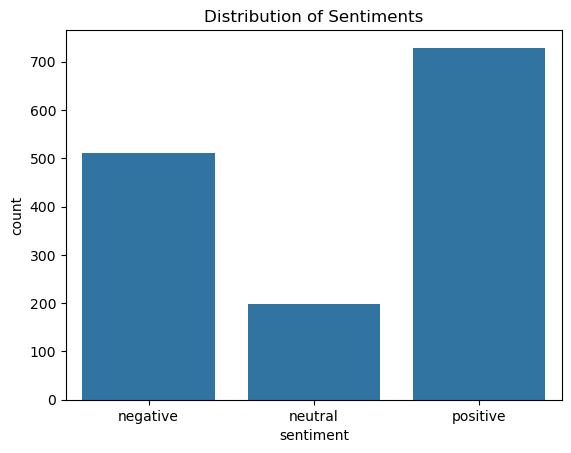

In [30]:
sns.countplot(data=sent_df, x='sentiment')
plt.title("Distribution of Sentiments")
plt.show()

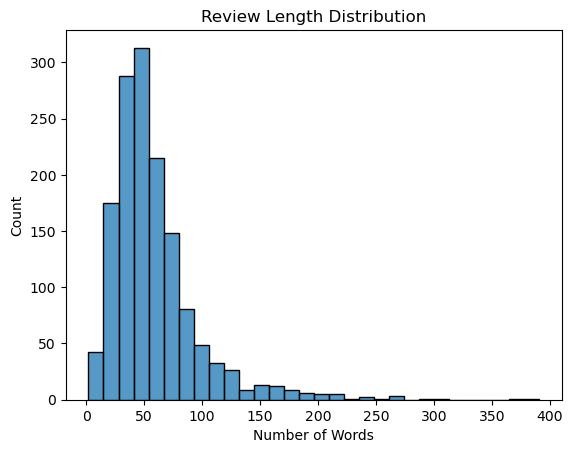

In [31]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=30)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.show()

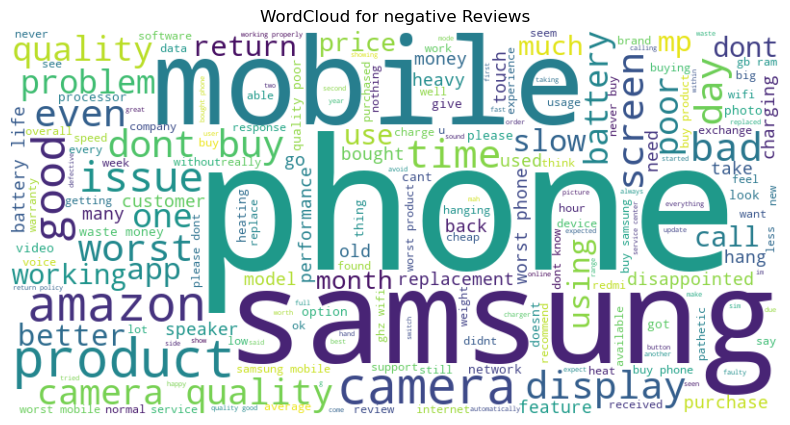

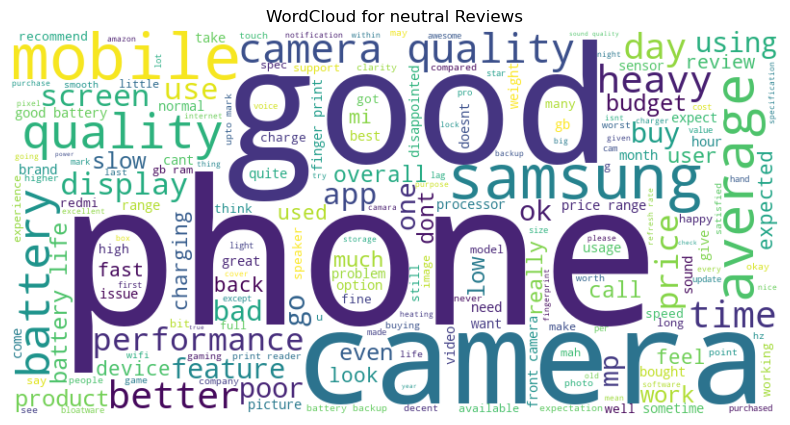

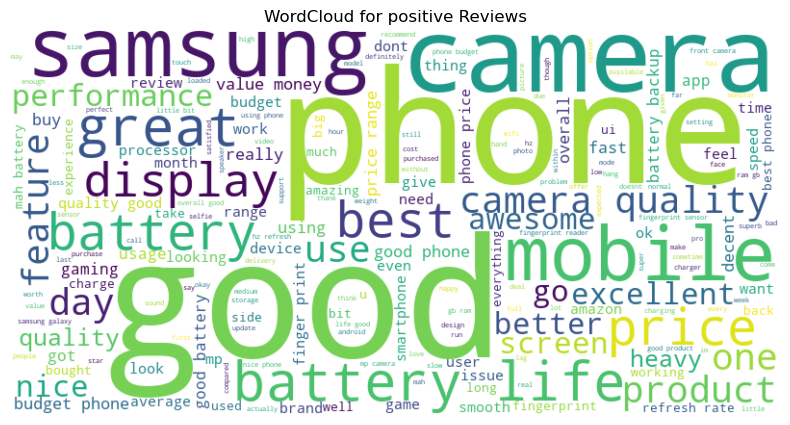

In [32]:
from wordcloud import WordCloud

for sentiment in sent_df['sentiment'].unique():
    text = " ".join(sent_df[sent_df['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Reviews')
    plt.show()

In [33]:
most_common_rating = sent_df['rating'].mode()[0]
print(f"The most frequent rating given by customers is: {most_common_rating}")

# we can  can also see the frequency of each rating
rating_counts = sent_df['rating'].value_counts()
print("\nFrequency of each rating:")
rating_counts

The most frequent rating given by customers is: 5

Frequency of each rating:


rating
5    419
1    384
4    310
3    199
2    126
Name: count, dtype: int64

In [34]:
# finding the mean values of ratings
if 'rating' in df.columns:
    mean_of_rating = df['rating'].mean()
    print(f"The mean rating given by customers is: {mean_of_rating}")
else:
    print("The DataFrame does not contain a 'rating' column. Please check the column names.")
print("\033[94m*****This ratings tells us that The eproduct is above Average*****\033[0m")

The mean rating given by customers is: 3.173611111111111
*****This ratings tells us that The eproduct is above Average*****


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [36]:
x_train, x_test, y_train, y_test = train_test_split(sent_df['text'], sent_df['sentiment'], test_size=0.1, random_state=42)

In [37]:
svm = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('svm_classifier', SVC(probability=True))
])


In [38]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('svm_classifier', SVC(probability=True))])

In [39]:
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.82      0.86        57
     neutral       0.00      0.00      0.00        18
    positive       0.73      0.97      0.83        69

    accuracy                           0.79       144
   macro avg       0.54      0.60      0.56       144
weighted avg       0.71      0.79      0.74       144



In [40]:
accuracy_score(y_test,y_pred)

0.7916666666666666

In [41]:
from sklearn.ensemble import RandomForestClassifier as RFC
random = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('randomforest', RFC ())
])


In [42]:
rclf = random.fit(x_train, y_train)

In [43]:
y_pred = random.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.81      0.74      0.77        57
     neutral       0.00      0.00      0.00        18
    positive       0.70      0.93      0.80        69

    accuracy                           0.74       144
   macro avg       0.50      0.55      0.52       144
weighted avg       0.66      0.74      0.69       144



In [44]:
accuracy_score(y_test,y_pred)

0.7361111111111112

In [115]:
x_train.head()

354    worst phone ever seen price worst phone ever s...
847    amazing phone bought father deal amazingly che...
785    value money got k good phone hang bit ok daily...
917    phone great price range k phone great price ra...
852    bad product product defective camera touch res...
Name: text, dtype: object

## Model used for Deploment

In [109]:
from sklearn.linear_model import LogisticRegression as LR
log = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('logistic', LR(solver='saga'))
])

In [110]:
model= log.fit(x_train, y_train)

In [111]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.82      0.85        57
     neutral       1.00      0.06      0.11        18
    positive       0.74      0.96      0.84        69

    accuracy                           0.79       144
   macro avg       0.87      0.61      0.60       144
weighted avg       0.82      0.79      0.75       144



In [112]:
accuracy_score(y_test,y_pred)

0.7916666666666666

In [126]:
prediction = model.predict(["camera quality like megapixel camera quality low"])[0]
prediction

'neutral'

In [113]:
import pickle
file='Dep.pkl'

In [114]:
pickle.dump(model,open(file,'wb'))

## End

In [49]:
from sklearn.naive_bayes import MultinomialNB
naive = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('naive', MultinomialNB())
])

In [50]:
nb= naive.fit(x_train, y_train)

In [51]:
y_pred = naive.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.94      0.60      0.73        57
     neutral       0.00      0.00      0.00        18
    positive       0.64      1.00      0.78        69

    accuracy                           0.72       144
   macro avg       0.53      0.53      0.50       144
weighted avg       0.68      0.72      0.66       144



In [52]:
accuracy_score(y_test,y_pred)

0.7152777777777778

In [53]:
from sklearn.tree import DecisionTreeClassifier
decision = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('decision', DecisionTreeClassifier())
])

In [54]:
tree= decision.fit(x_train, y_train)

In [55]:
y_pred= decision.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.71      0.61      0.66        57
     neutral       0.19      0.28      0.23        18
    positive       0.67      0.67      0.67        69

    accuracy                           0.60       144
   macro avg       0.52      0.52      0.52       144
weighted avg       0.63      0.60      0.61       144



In [56]:
accuracy_score(y_test,y_pred)

0.5972222222222222

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [58]:
knn= knn.fit(x_train, y_train)

In [59]:

y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.81      0.75      0.78        57
     neutral       0.14      0.06      0.08        18
    positive       0.73      0.88      0.80        69

    accuracy                           0.73       144
   macro avg       0.56      0.56      0.55       144
weighted avg       0.69      0.73      0.70       144



In [60]:
accuracy_score (y_test,y_pred)

0.7291666666666666

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('gradient', GradientBoostingClassifier())
])

In [62]:
grad= gradient.fit(x_train, y_train)

In [63]:
y_pred= gradient.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.81      0.74      0.77        57
     neutral       0.20      0.06      0.09        18
    positive       0.74      0.93      0.82        69

    accuracy                           0.74       144
   macro avg       0.58      0.57      0.56       144
weighted avg       0.70      0.74      0.71       144



In [64]:
accuracy_score(y_test,y_pred)

0.7430555555555556

In [65]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('adaboost', AdaBoostClassifier())
])

In [66]:
ada= adaboost.fit(x_train, y_train)

In [67]:
y_pred= adaboost.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.79      0.78        57
     neutral       0.25      0.17      0.20        18
    positive       0.81      0.87      0.84        69

    accuracy                           0.75       144
   macro avg       0.61      0.61      0.61       144
weighted avg       0.73      0.75      0.74       144



In [68]:
accuracy_score(y_test,y_pred)

0.75